### Its doing something right

It's working, the noise is a bit odd. Will investigate
the performance soon.

Sometimes the MF regressor creates massive noise in the predictions

In [1]:
using Plots
include("Mondrian_Forest_Regressor.jl")

predict! (generic function with 3 methods)

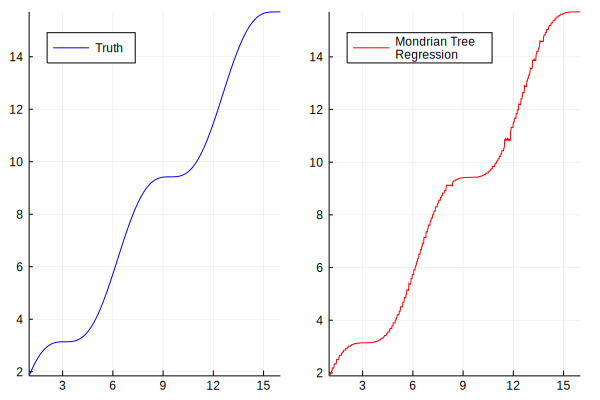

In [7]:
X = collect(linspace(1,16,1000))
Y = X+sin.(X)

MT = Mondrian_Tree_Regressor()
train!(MT, X, Y, 1e9, 10);

y = predict!(MT,X);

p1 = plot(X,Y, label="Truth", color="blue");
p2 = plot(X,y, label="Mondrian Tree  \nRegression",color="red");
plot(p1,p2,legend=:topleft)

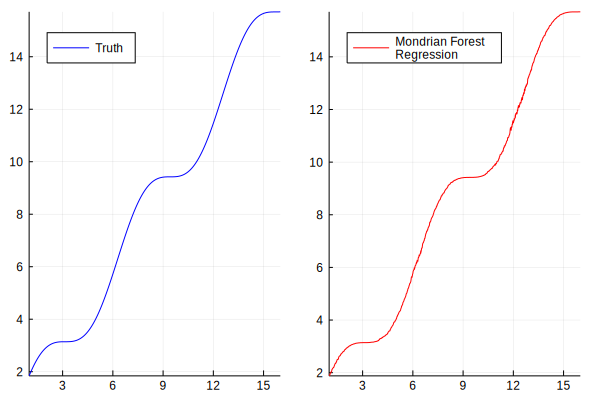

In [9]:
X = collect(linspace(1,16,1000))
Y = X+sin.(X)

MF = Mondrian_Forest_Regressor()
train!(MF, X, Y, 1e9, 10);

y = predict!(MF,X);

p1 = plot(X,Y, label="Truth", color="blue");
p2 = plot(X,y, label="Mondrian Forest  \nRegression",color="red");
plot(p1,p2,legend=:topleft)